# Sepsis cases dataset experiment

## Dependencies

In [ ]:
# Skip this cell, at first
import os
os.chdir('../..')
os.getcwd()

In [1]:
from CI_Experiments.pipeline.pipeline import Experiment # if this line results ModuleNotFoundError, then execute the cell above
import pandas as pd
from CI_Experiments.config import PROJECT_DIR

2023-05-04 22:57:24,511 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


## Constants

In [2]:
DATA_PATH = PROJECT_DIR / 'data/prepared_process_logs/Traffic_fines/activity/activity.csv'
RESULT_PATH = PROJECT_DIR / 'experiments/results/Traffic_fines/activity_time'
RESULT_PATH_2 = PROJECT_DIR / 'experiments/results/Traffic_fines/activity_time/2'

## Experiment

### Data read

In [3]:
data = pd.read_csv(DATA_PATH)
data.head()

,Case ID,Outcome,Activity,Timestamp
0,A100,1,Create Fine,2006-08-02 01:00:00
1,A100,1,Send Fine,2006-12-12 01:00:00
2,A100,1,Insert Fine Notification,2007-01-15 01:00:00
3,A100,1,Add penalty,2007-03-16 01:00:00
4,A10000,0,Create Fine,2007-03-09 01:00:00


### Data preparation

In [4]:
exp = Experiment()
prepared_data = exp.prepare_data(data=data, save_path=RESULT_PATH)
prepared_data

In [6]:
train_data = prepared_data['train']
train_data = train_data.reset_index(drop=True)
train_data.head()

,Activity_Add penalty,Activity_Appeal to Judge,Activity_Create Fine,Activity_Insert Date Appeal to Prefecture,Activity_Insert Fine Notification,Activity_Notify Result Appeal to Offender,Activity_Payment,Activity_Receive Result Appeal from Prefecture,Activity_Send Appeal to Prefecture,Activity_Send Fine,Outcome
0,0.0,0.0,11491200.1,0.0,0.0,0.0,5184000.0,0.0,0.0,0.0,1.0
1,950400.0,0.0,7344000.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,345600.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5184000.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16243200.1,0.0,0.0,0.0,4924800.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data = prepared_data['test']
test_data = test_data.reset_index(drop=True)
test_data.head()

### Causal discovery

#### First tryout

In [ ]:
cd = exp.causal_discovery(data=train_data, save_path=RESULT_PATH)
cd

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/ylearn/causal_discovery/_discovery.py:83: UserWarning: An output with one or more elements was resized since it had shape [1, 11, 11], which does not match the required output shape [1, 1, 11, 11]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/Resize.cpp:24.)
  h = torch.trace(torch.matrix_exp(s)) - d
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**************************
Identify finished
identifier: notears
duration: 517.1288819313049



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**************************
Identify finished
identifier: gcastle_DirectLiNGAM
duration: 8.451256036758423



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**************************
Identify finished
identifier: gcastle_ICALiNGAM
duration: 3.378519058227539



2023-05-04 23:15:18,300 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=103692, d=11, iter_=100, h_=1e-08, rho_=1e+16


**************************
Identify finished
identifier: gcastle_PC
duration: 15.675215721130371



2023-05-04 23:15:19,681 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=1.448e-04, loss=142197717707432.094, rho=1.0e+00
2023-05-04 23:15:19,786 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.448e-04, loss=140523411270063.125, rho=1.0e+00
2023-05-04 23:15:19,893 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.448e-04, loss=140523411270063.125, rho=1.0e+01
2023-05-04 23:15:19,995 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.448e-04, loss=140523411270063.125, rho=1.0e+02
2023-05-04 23:15:20,098 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/cas

**************************
Identify finished
identifier: gcastle_Notears
duration: 5.686834812164307



2023-05-04 23:16:27,661 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/nonlinear.py[line:249] - INFO: FINISHED
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
2023-05-04 23:16:31,225 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:122] - INFO: GPU is unavailable.
2023-05-04 23:16:31,235 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2023-05-04 23:16:31,245 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 0] score=247.121, likelih

**************************
Identify finished
identifier: gcastle_NotearsNonlinear
duration: 66.80060720443726



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem_utils/golem_model.py:139: UserWarning: An output with one or more elements was resized since it had shape [1, 11, 11], which does not match the required output shape [1, 1, 11, 11]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/Resize.cpp:24.)
  return torch.trace(torch.matrix_exp(self.B * self.B)) - self.d
2023-05-04 23:17:44,103 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 5000] score=247.067, likelihood=247.055, h=5.4e-05
2023-05-04 23:

**************************
Identify finished
identifier: gcastle_GOLEM
duration: 1325.0325179100037



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

#### Second tryout (shuffled variable positions)

In [9]:
exp2 = Experiment()

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/ylearn/causal_discovery/_discovery.py:83: UserWarning: An output with one or more elements was resized since it had shape [1, 16, 16], which does not match the required output shape [1, 1, 16, 16]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/Resize.cpp:24.)
  h = torch.trace(torch.matrix_exp(s)) - d


**************************
Identify finished
identifier: notears
duration: 26.96387004852295



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**************************
Identify finished
identifier: gcastle_DirectLiNGAM
duration: 0.7336239814758301



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**************************
Identify finished
identifier: gcastle_ICALiNGAM
duration: 0.3535017967224121



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
2023-05-04 22:46:04,156 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=625, d=16, iter_=100, h_=1e-08, rho_=1e+16
2023-05-04 22:46:04,310 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=2.408e-02, loss=109413357813.514, rho=1.0e+00
2023-05-04 22:46:04,317 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.408e-02, loss=91453001723.394, rho=1.0e+00
2023-05-04 22:46:04,325 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gr

**************************
Identify finished
identifier: gcastle_PC
duration: 0.2152848243713379



2023-05-04 22:46:04,356 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.408e-02, loss=91453002013.203, rho=1.0e+06
2023-05-04 22:46:04,363 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.408e-02, loss=91453004621.485, rho=1.0e+07
2023-05-04 22:46:04,369 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.407e-02, loss=91453030704.308, rho=1.0e+08
2023-05-04 22:46:04,376 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.406e-02, loss=91453291532.543, rho=1.0e+09
2023-05-04 22:46:04,387 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/g

**************************
Identify finished
identifier: gcastle_Notears
duration: 1.7190277576446533



2023-05-04 22:46:20,225 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/nonlinear.py[line:249] - INFO: FINISHED
2023-05-04 22:46:20,510 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:122] - INFO: GPU is unavailable.
2023-05-04 22:46:20,512 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2023-05-04 22:46:20,513 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 0] score=262.419, likelihood=262.419, h=0.0e+00


**************************
Identify finished
identifier: gcastle_NotearsNonlinear
duration: 14.194304943084717



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem_utils/golem_model.py:139: UserWarning: An output with one or more elements was resized since it had shape [1, 16, 16], which does not match the required output shape [1, 1, 16, 16]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/Resize.cpp:24.)
  return torch.trace(torch.matrix_exp(self.B * self.B)) - self.d
2023-05-04 22:46:24,206 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 5000] score=258.334, likelihood=257.505, h=3.6e-02
2023-05-04 22:

**************************
Identify finished
identifier: gcastle_GOLEM
duration: 75.16637802124023



/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't su

**************************
Identify finished
identifier: pgm_PC
duration: 81.49788284301758



Building tree:   0%|          | 0/120.0 [00:00<?, ?it/s]

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics e

**************************
Identify finished
identifier: pgm_TreeSearch
duration: 0.16208481788635254



,identifier_name,treatment,adjustment,covariate,instrument,duration,causal_graph
0,notears,"[Activity_CRP, Activity_Admission NC]",None,"[Activity_LacticAcid, Activity_IV Liquid, Acti...",None,26.96387,[[[[[0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.]]]...
1,gcastle_DirectLiNGAM,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],0.733624,"[[[[[0. 1. 1. 1. 1.]]]], [[[[0. 0. 0. 0. 0.]]]..."
2,gcastle_ICALiNGAM,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Antibiotics, Activity_Release C, ...","[Activity_IV Liquid, Activity_other]",0.353502,"[[[[[0. 1. 0. 1. 1. 0.]]]], [[[[0. 0. 0. 1. 1...."
3,gcastle_PC,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],0.215285,[[[[[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]]]...
4,gcastle_Notears,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],1.719028,"[[[[[0. 1. 0. 0. 0. 0. 1. 1. 1.]]]], [[[[0. 0...."
5,gcastle_NotearsNonlinear,"[Activity_LacticAcid, Activity_ER Sepsis Triage]",None,"[Activity_Release D, Activity_IV Liquid, Activ...",None,14.194305,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....
6,gcastle_GOLEM,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_Release C, Activity_CRP, Activity_Le...","[Activity_IV Liquid, Activity_IV Antibiotics, ...",75.166378,[[[[[0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]]]...
7,pgm_PC,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",None,81.497883,"[[[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]], [[[[0...."
8,pgm_TreeSearch,[Activity_CRP],None,"[Activity_LacticAcid, Activity_Release D, Acti...",None,0.162085,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....


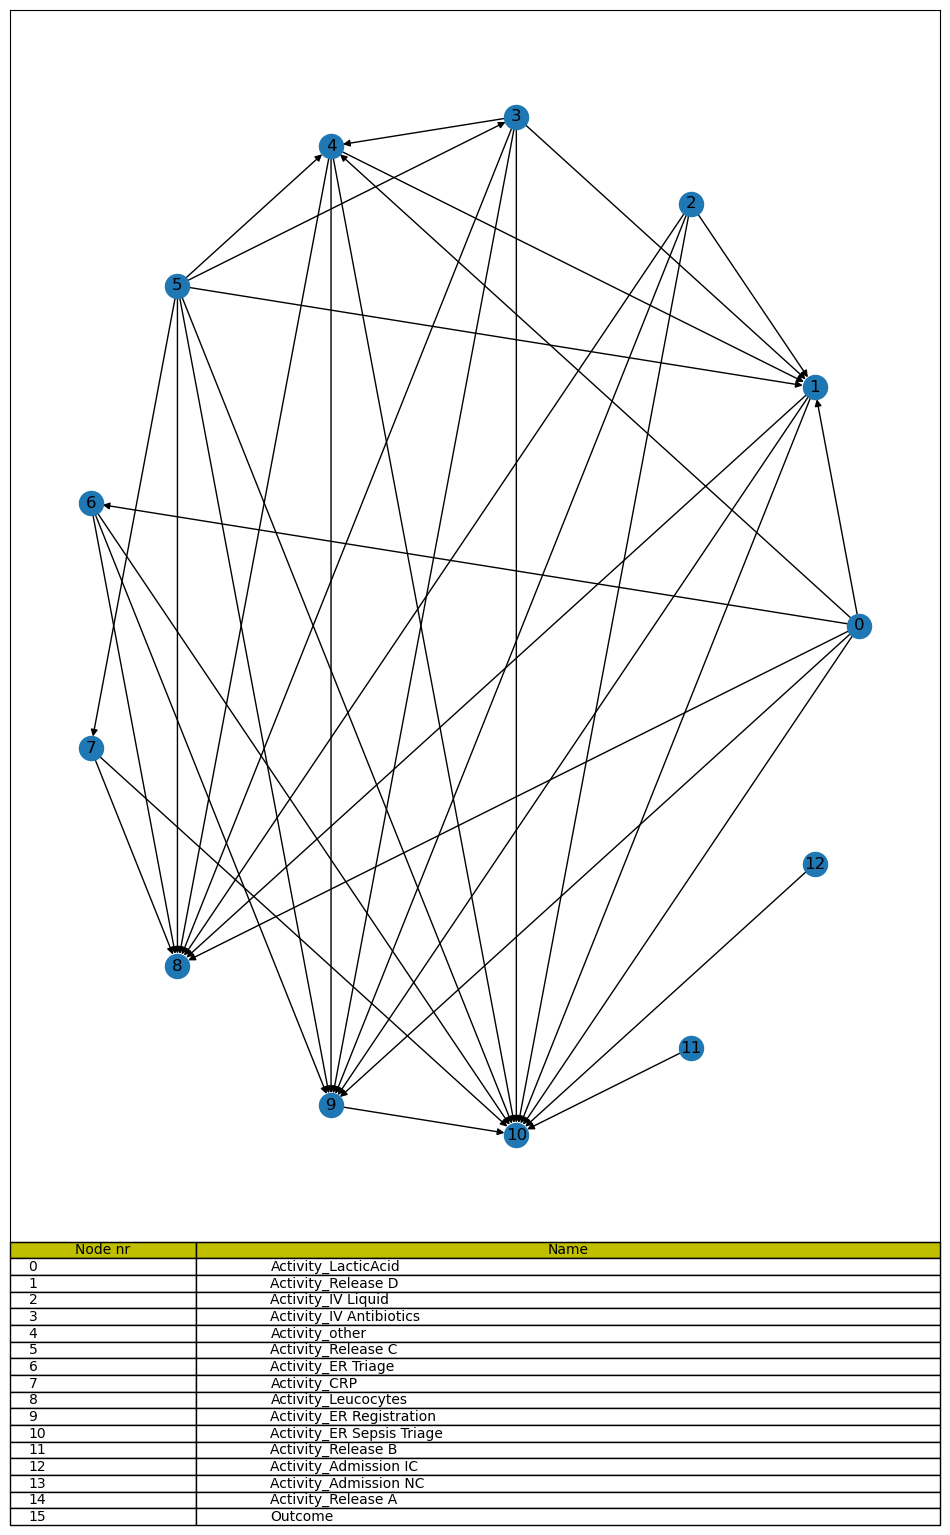

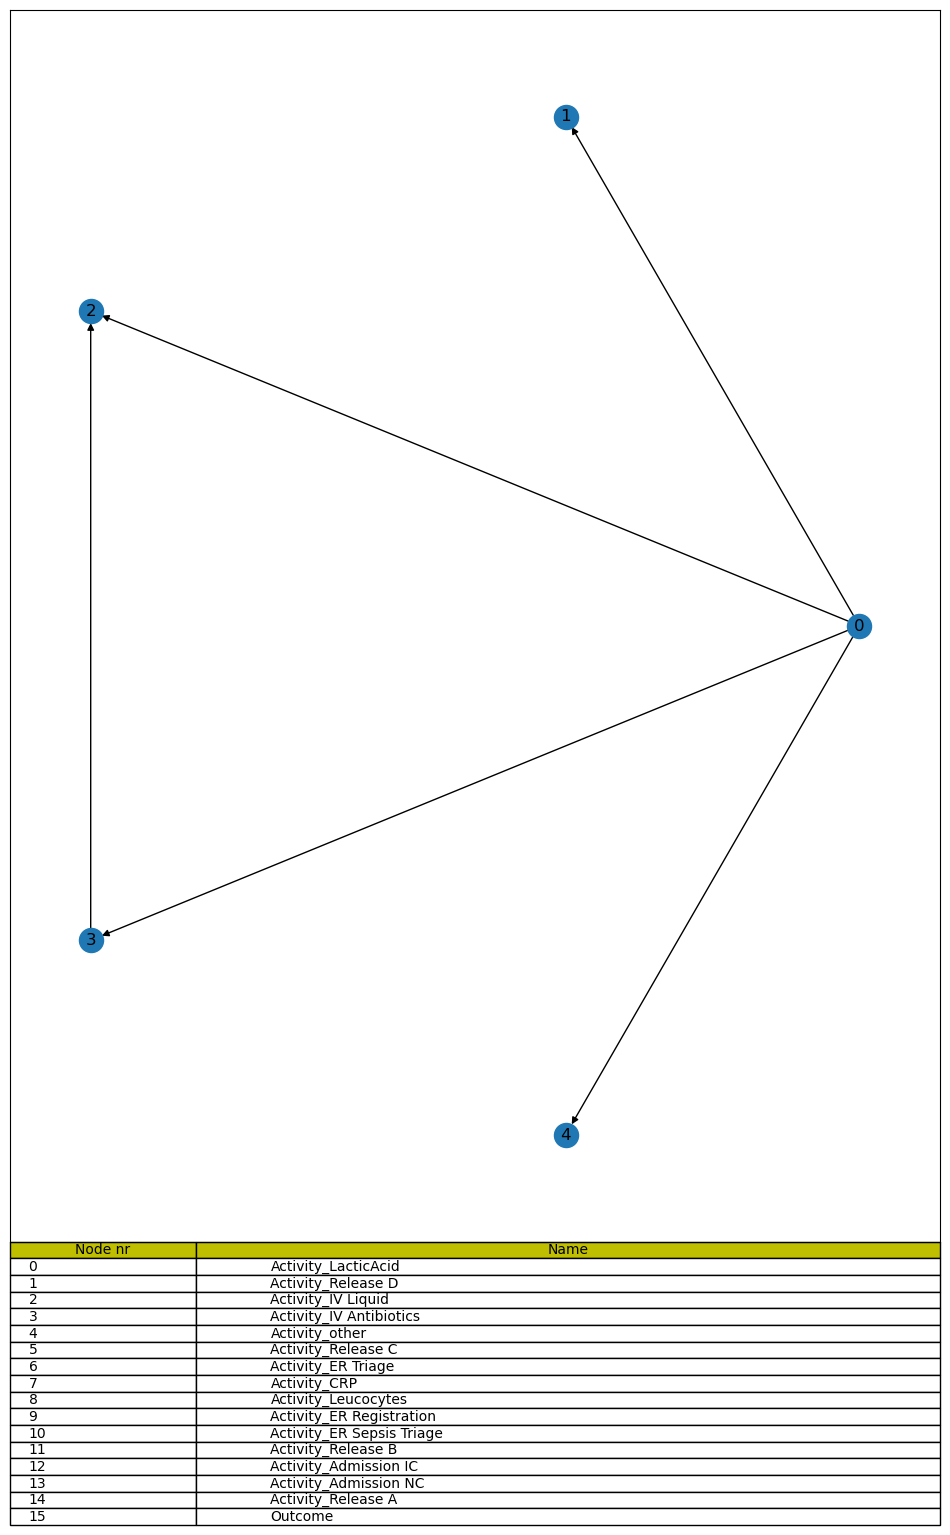

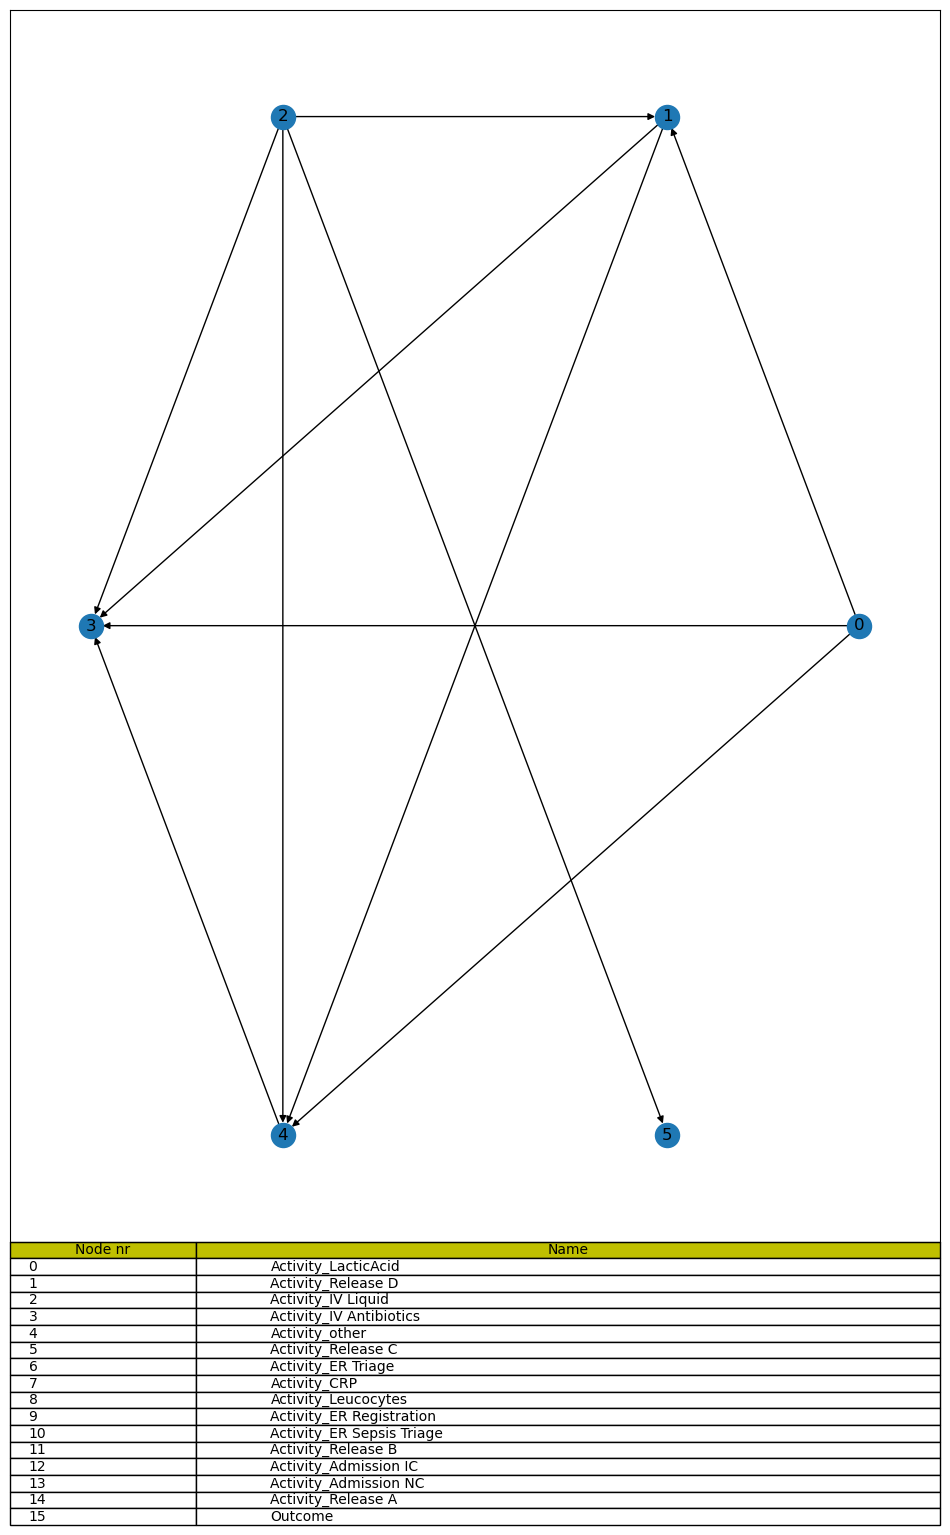

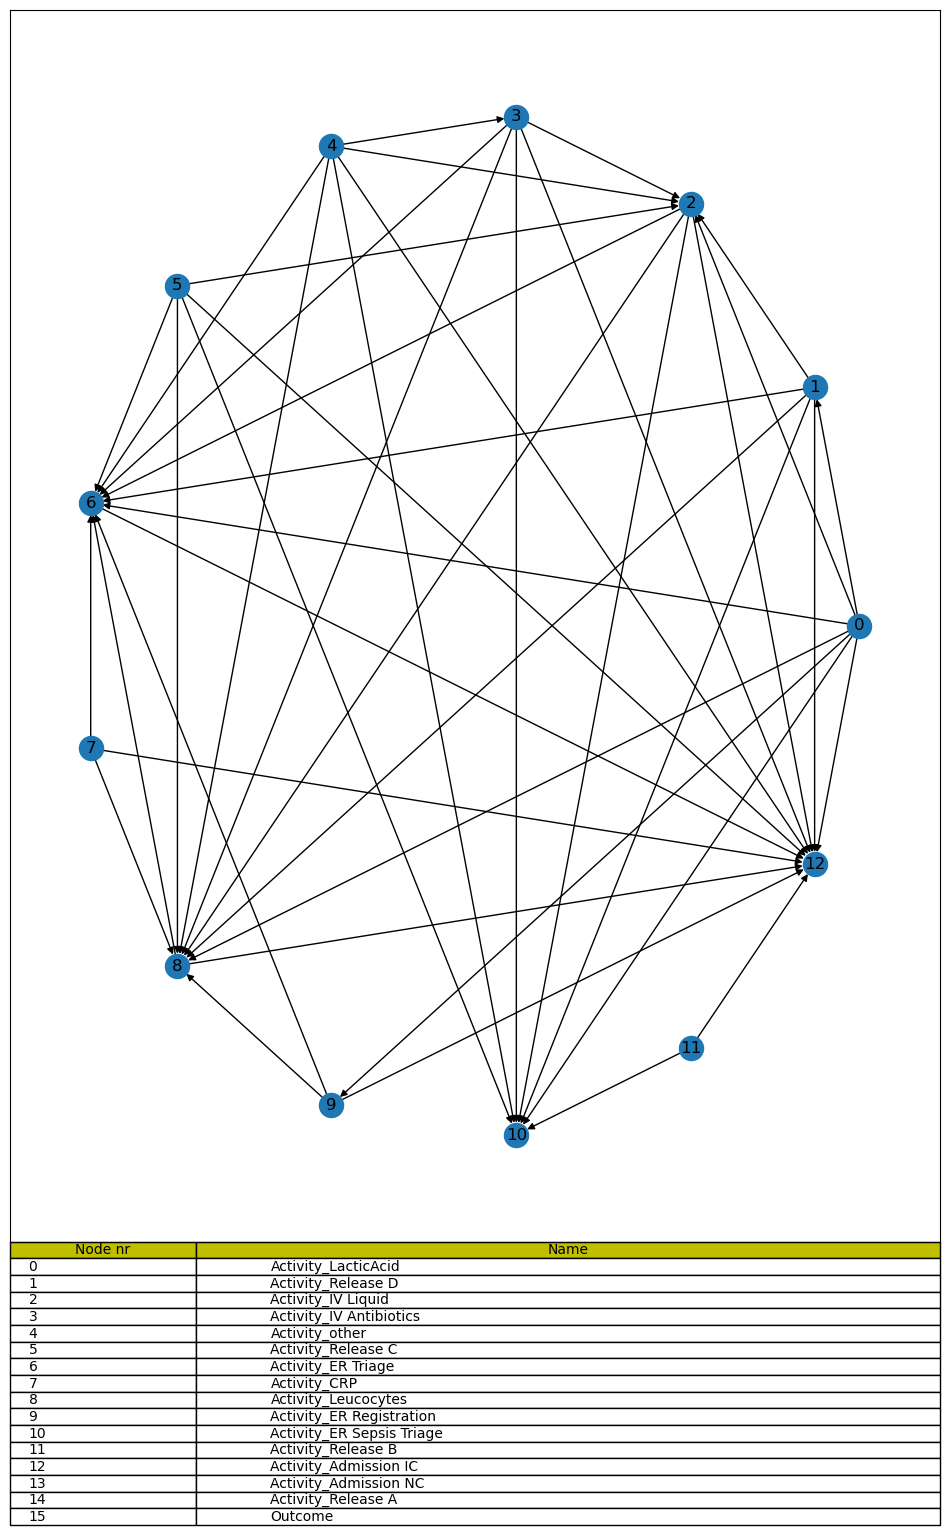

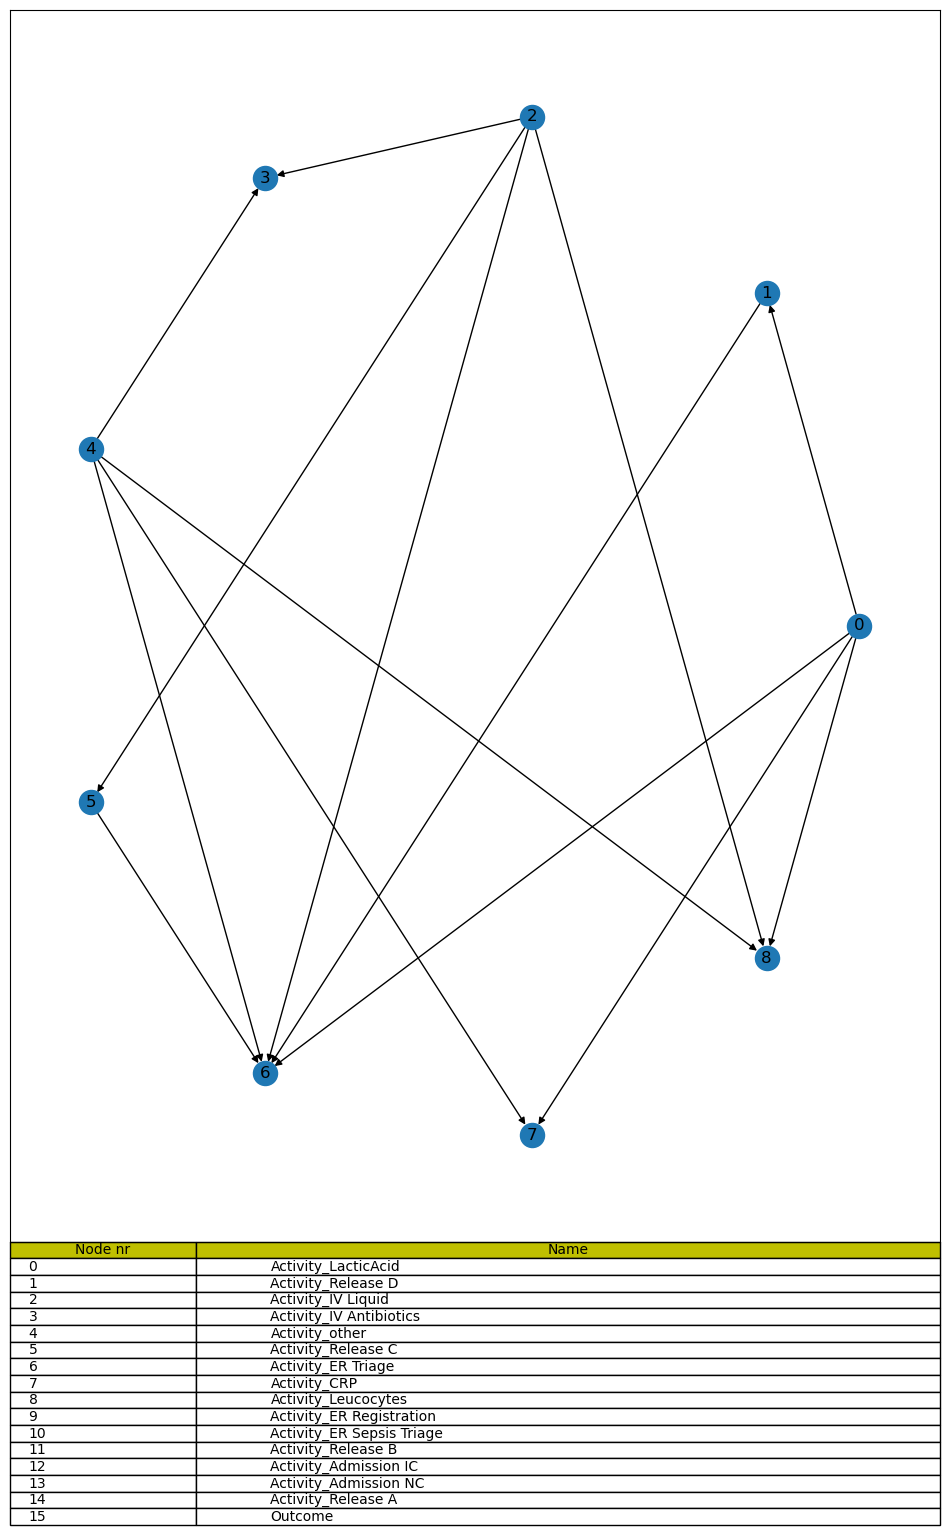

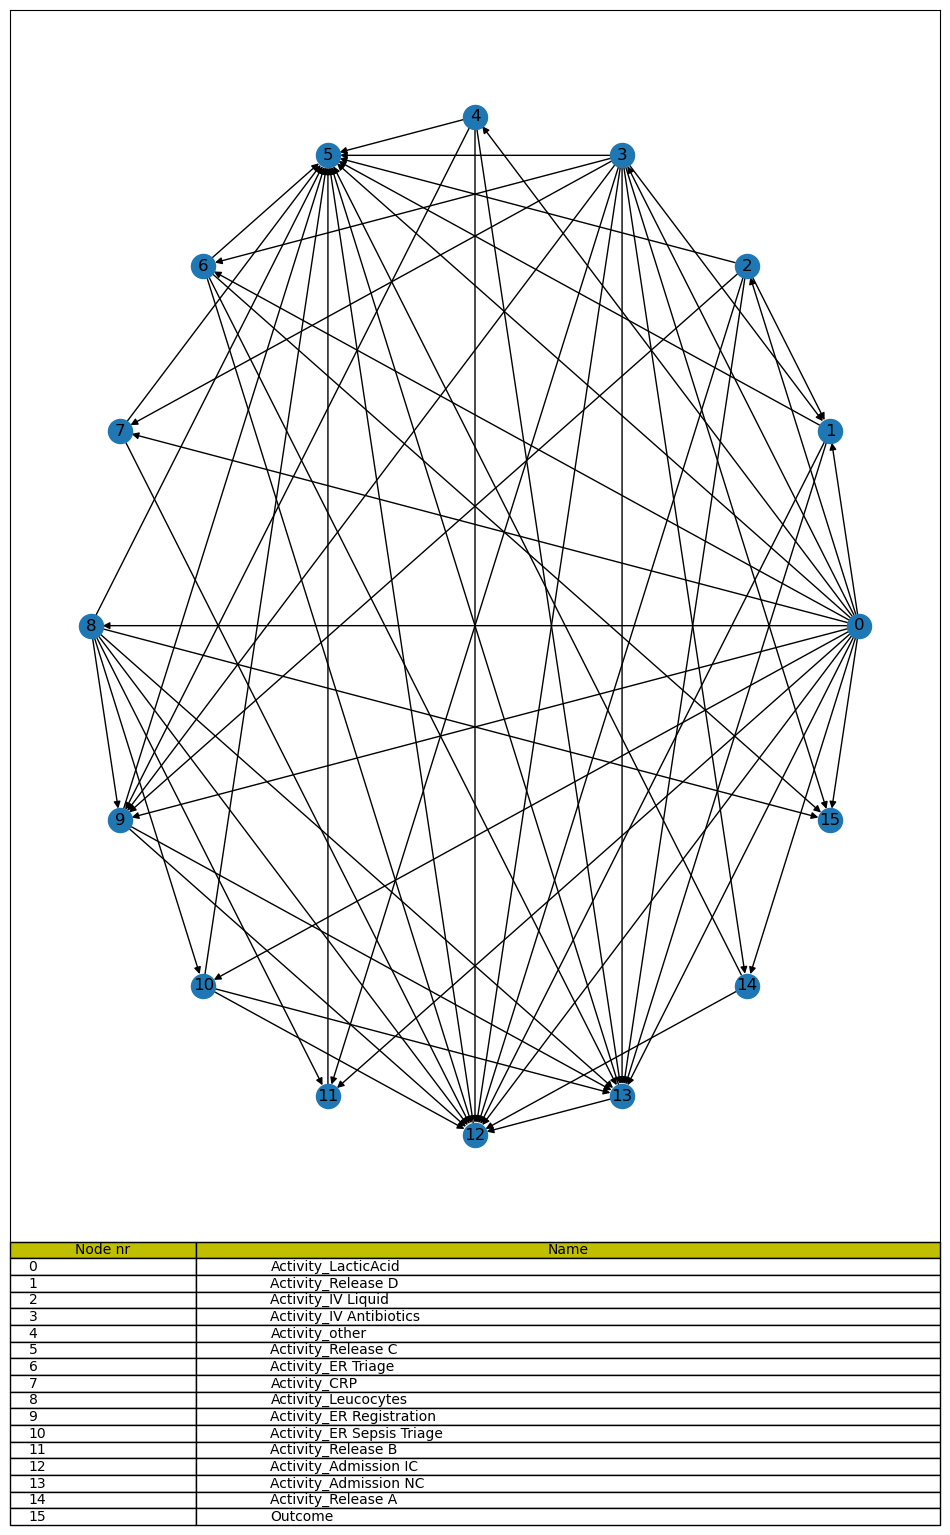

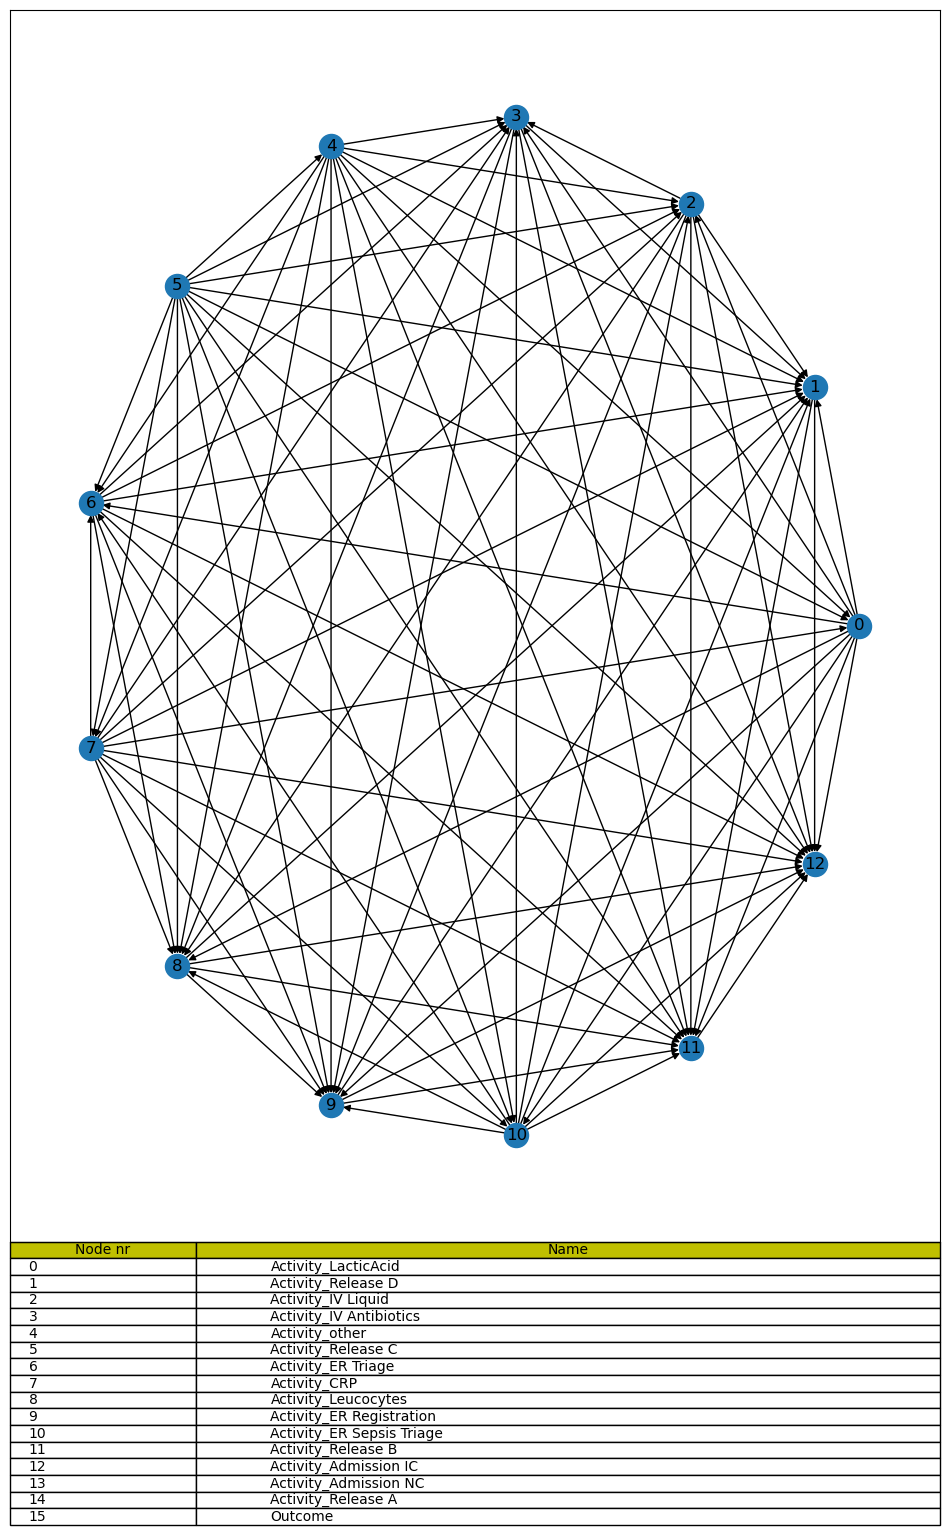

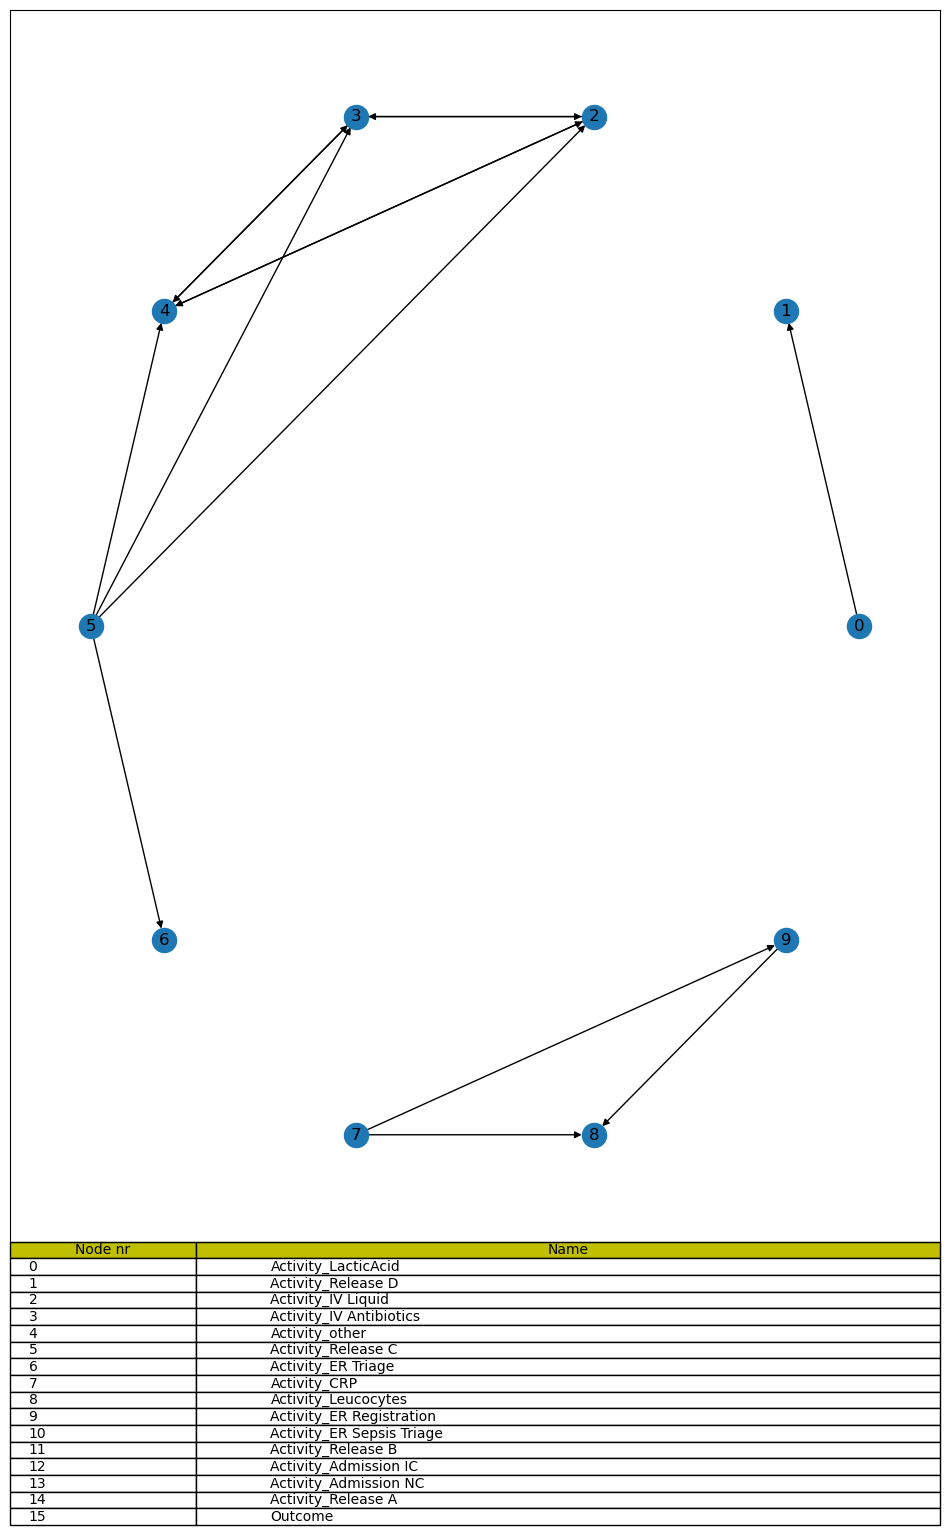

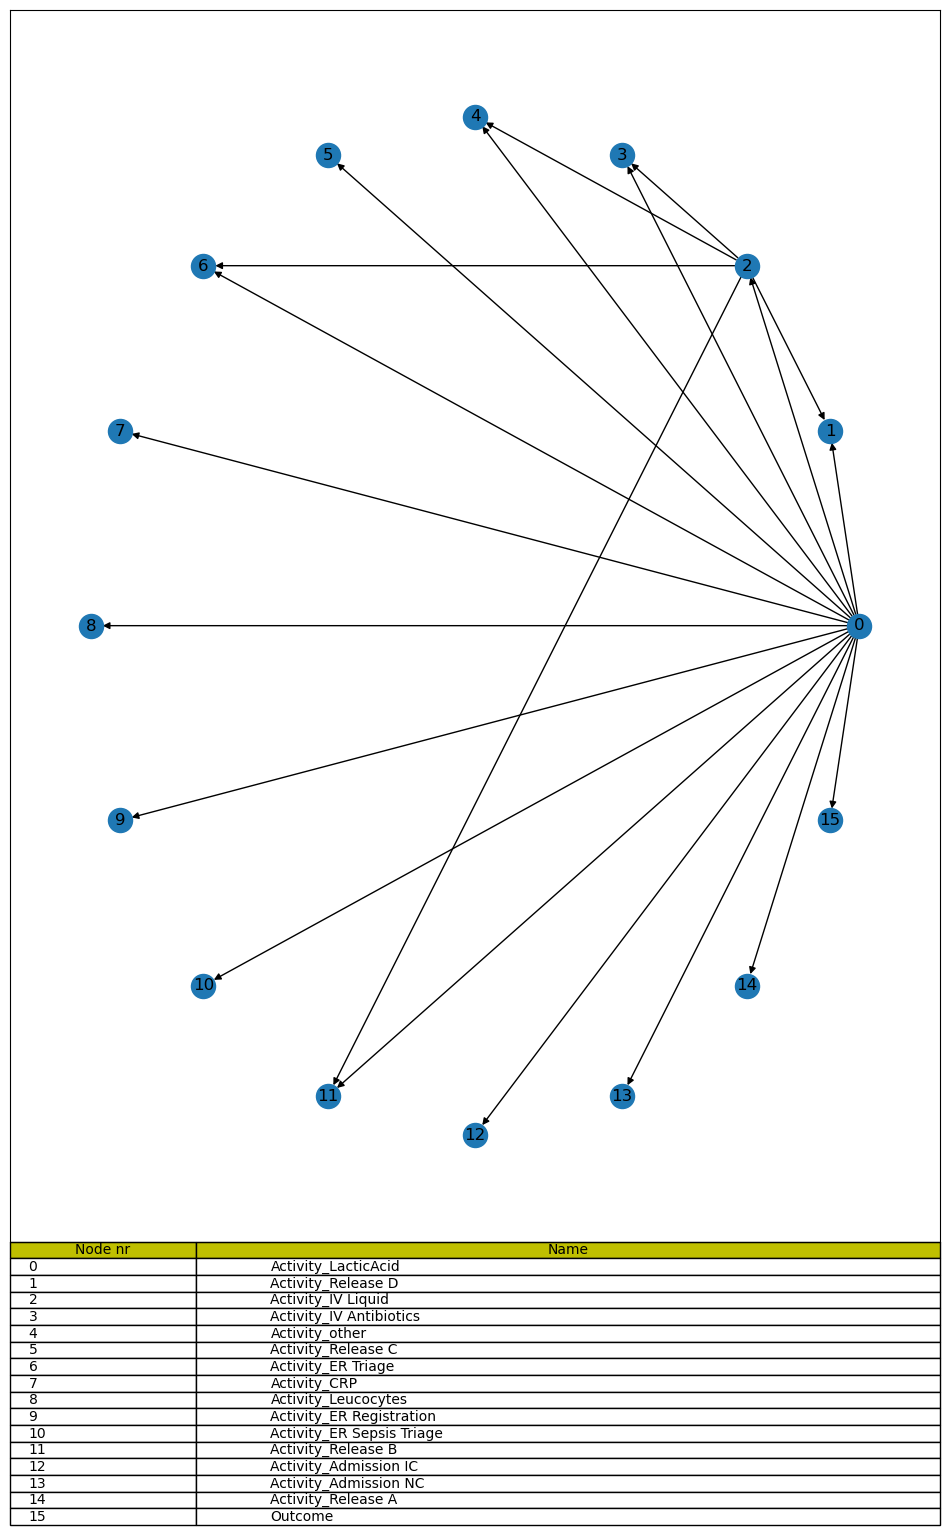

In [10]:
cd2 = exp2.causal_discovery(data=train_data, save_path=RESULT_PATH_2, shuffle=True)
cd2

#### Compare discovery results

In [11]:
comparison_result = exp.compare_causal_discovery_results(exp2)
comparison_result

,identifier_name,treatment_1,adjustment_1,covariate_1,instrument_1,duration_1,causal_graph_1,treatment_2,adjustment_2,covariate_2,instrument_2,duration_2,causal_graph_2,Consistency
0,notears,"[Activity_CRP, Activity_Admission NC]",None,"[Activity_ER Registration, Activity_ER Sepsis ...",None,26.533561,[[[[[0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]]]...,"[Activity_CRP, Activity_Admission NC]",None,"[Activity_LacticAcid, Activity_IV Liquid, Acti...",None,26.96387,[[[[[0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.]]]...,1.0
1,gcastle_DirectLiNGAM,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_ER Registration, Activ...",[Activity_other],0.667156,"[[[[[0. 1. 1. 1. 1.]]]], [[[[0. 0. 0. 0. 0.]]]...","[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],0.733624,"[[[[[0. 1. 1. 1. 1.]]]], [[[[0. 0. 0. 0. 0.]]]...",0.0
2,gcastle_ICALiNGAM,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_ER Registration, Activ...",[Activity_other],0.264346,"[[[[[0. 1. 1. 0. 1.]]]], [[[[0. 0. 0. 0. 0.]]]...","[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Antibiotics, Activity_Release C, ...","[Activity_IV Liquid, Activity_other]",0.353502,"[[[[[0. 1. 0. 1. 1. 0.]]]], [[[[0. 0. 0. 1. 1....",0.0
3,gcastle_PC,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_ER Registration, Activ...",[Activity_other],0.118726,[[[[[0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]]]...,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],0.215285,[[[[[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]]]...,0.0
4,gcastle_Notears,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_ER Registration, Activ...","[Activity_Release C, Activity_Release D, Activ...",1.427213,"[[[[[0. 1. 0. 0. 0. 1. 1. 0. 1.]]]], [[[[0. 0....","[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",[Activity_other],1.719028,"[[[[[0. 1. 0. 0. 0. 0. 1. 1. 1.]]]], [[[[0. 0....",0.0
5,gcastle_NotearsNonlinear,[Activity_Release A],None,"[Activity_Admission IC, Activity_Admission NC,...",None,11.144195,[[[[[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1....,"[Activity_LacticAcid, Activity_ER Sepsis Triage]",None,"[Activity_Release D, Activity_IV Liquid, Activ...",None,14.194305,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,0.0
6,gcastle_GOLEM,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_LacticAcid, Activity_L...","[Activity_ER Registration, Activity_ER Sepsis ...",74.815271,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]...,"[Activity_LacticAcid, Activity_Release D]",None,"[Activity_Release C, Activity_CRP, Activity_Le...","[Activity_IV Liquid, Activity_IV Antibiotics, ...",75.166378,[[[[[0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]]]...,0.0
7,pgm_PC,"[Activity_Admission IC, Activity_Admission NC]",None,"[Activity_CRP, Activity_ER Registration, Activ...",[Activity_Release C],81.691658,"[[[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]], [[[[0....","[Activity_LacticAcid, Activity_Release D]",None,"[Activity_IV Liquid, Activity_IV Antibiotics, ...",None,81.497883,"[[[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]], [[[[0....",0.0
8,pgm_TreeSearch,[Activity_CRP],None,"[Activity_Admission IC, Activity_Admission NC,...",None,0.204108,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,[Activity_CRP],None,"[Activity_LacticAcid, Activity_Release D, Acti...",None,0.162085,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,1.0


In [12]:
comparison_result[comparison_result['Consistency'] == 1.0]

,identifier_name,treatment_1,adjustment_1,covariate_1,instrument_1,duration_1,causal_graph_1,treatment_2,adjustment_2,covariate_2,instrument_2,duration_2,causal_graph_2,Consistency
0,notears,"[Activity_CRP, Activity_Admission NC]",None,"[Activity_ER Registration, Activity_ER Sepsis ...",None,26.533561,[[[[[0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]]]...,"[Activity_CRP, Activity_Admission NC]",None,"[Activity_LacticAcid, Activity_IV Liquid, Acti...",None,26.96387,[[[[[0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.]]]...,1.0
8,pgm_TreeSearch,[Activity_CRP],None,"[Activity_Admission IC, Activity_Admission NC,...",None,0.204108,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,[Activity_CRP],None,"[Activity_LacticAcid, Activity_Release D, Acti...",None,0.162085,[[[[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,1.0


### Causal estimation

In [13]:
exp3 = Experiment()

In [14]:
treatment = cd2['treatment'].values[0]
adjustment = None 
covariate = cd2['covariate'].values[0]
instrument = None
print(treatment, adjustment, covariate, instrument)

['Activity_CRP', 'Activity_Admission NC'] None ['Activity_LacticAcid', 'Activity_IV Liquid', 'Activity_IV Antibiotics', 'Activity_other', 'Activity_ER Triage', 'Activity_Leucocytes', 'Activity_ER Registration', 'Activity_Release B', 'Activity_Release A'] None


#### reverse_treatment=True to inverse Qini scores (from negative to positive - results does not change, just the qini score sign)

**************************
Estimation finished
estimator: slearner
duration: 5.024535179138184

**************************
Estimation finished
estimator: tlearner
duration: 2.872279167175293



2023-05-04 22:53:16,023 - /Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py[line:183] - ERROR: Unexpected error!
Traceback (most recent call last):
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py", line 179, in _estimate_and_uplift_with_error_except
    estimate_and_uplift_func(estimator_name, estimator_options)
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py", line 170, in _estimate_and_uplift_with_timeout
    func_timeout(self.timeout, self._estimate_and_uplift, args=(
  File "/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/func_timeout/dafunc.py", line 108, in func_timeout
    raise_exception(exception)
  File "/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/func_timeout/py3_raise.py", line 7, in raise_exception
    raise exception[0] from None
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_

**************************
Estimation finished
estimator: tree
duration: 0.03446817398071289

**************************
Estimation finished
estimator: grf
duration: 1.5927727222442627



2023-05-04 22:53:20,016 - /Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py[line:183] - ERROR: Unexpected error!
Traceback (most recent call last):
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py", line 179, in _estimate_and_uplift_with_error_except
    estimate_and_uplift_func(estimator_name, estimator_options)
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_estimation.py", line 170, in _estimate_and_uplift_with_timeout
    func_timeout(self.timeout, self._estimate_and_uplift, args=(
  File "/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/func_timeout/dafunc.py", line 108, in func_timeout
    raise_exception(exception)
  File "/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/func_timeout/py3_raise.py", line 7, in raise_exception
    raise exception[0] from None
  File "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/pipeline/causal_

**************************
Estimation finished
estimator: dr
duration: 8.32635498046875



(       mean       min       max       std  \
 0 -0.011526 -0.954824  0.230419  0.102347   
 1 -0.029504 -0.999959  0.659681  0.182325   
 2  0.000744 -0.999959  0.999959  0.487143   
 3  0.014483 -0.999958  0.999959  0.458607   
 4  0.140126       0.0   0.99999  0.347116   
 5  0.133757       0.0   0.99999  0.340389   
 6  0.026034 -0.581849  0.563271  0.212337   
 7  0.020615 -0.678982  0.847847  0.212133   
 8       0.0       0.0       0.0       0.0   
 9 -0.002553 -0.400691      -0.0  0.031877   
 
                                               detail estimator_name  duration  
 0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.954823844533...       slearner  5.024535  
 1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6596813605024...       slearner  5.024535  
 2  [-2.3213986705646126e-07, -0.9999589031298713,...       tlearner  2.872279  
 3  [0.014045411857573041, 0.9999593891148869, 8.7...       tlearner  2.872279  
 4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...           tree  0.034468  
 5  [0

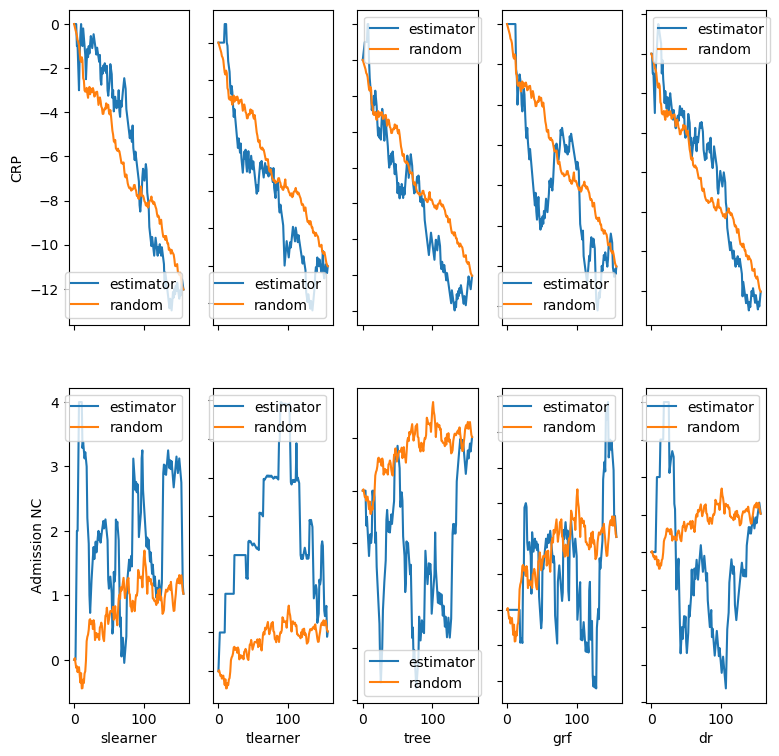

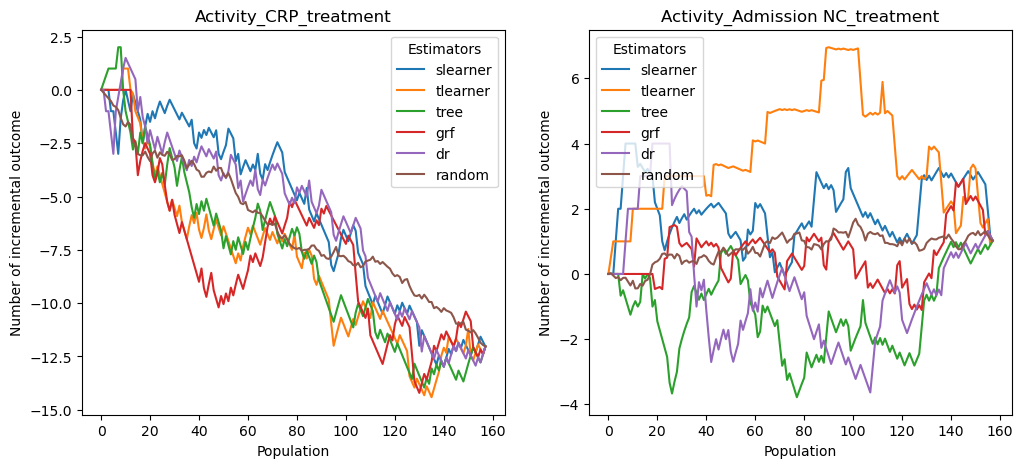

In [16]:
ce = exp3.causal_estimation(
    train_data=train_data,
    test_data=test_data,
    treatment=treatment,
    adjustment=adjustment,
    covariate=covariate,
    instrument=instrument,
    discrete_treatment=False,
    adjust_treatment=True,
    reverse_treatment=True,
    path=RESULT_PATH)
ce